#  Linear Regression-EmissionsHighGranularity Metrics

## Model Objectives:
- Dataset (emissions_high_granularity)
- Develop a predictive model that estimates total operational emissions (MtCO2e) or total emissions (MtCO2e) based on production volume, commodity type, and other emissions factors.
- Determine how different factors like production value, commodity type (Sub-Bituminous vs. Metallurgical Coal, Natural Gas, Oil &  NGL), and specific emission sources (venting, flaring, fugitive methane, own fuel use, etc.) impact total emissions.
- Forecast future emissions trends based on historical production and emission patterns.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score, explained_variance_score
import scipy as sp

import myfuns

## Load the Dataset

In [2]:
df=pd.read_csv('emissions_high_granularity.csv')
df.head()


,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,emissions_category
0,1854,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,50.9000,Million tonnes/yr,92.3401,0.0,0.0,0.0,10.4316,0.3726,10.4316,102.7717,High
1,1855,Adaro Energy,Investor-owned Company,Adaro Energy,Metallurgical Coal,0.9000,Million tonnes/yr,2.3989,0.0,0.0,0.0,0.2710,0.0097,0.2710,2.6700,Low
2,1856,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,48.2300,Million tonnes/yr,87.4963,0.0,0.0,0.0,9.8844,0.3530,9.8844,97.3807,High
3,1857,Adaro Energy,Investor-owned Company,Adaro Energy,Metallurgical Coal,5.7700,Million tonnes/yr,15.3799,0.0,0.0,0.0,1.7375,0.0621,1.7375,17.1174,Low
4,1858,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,52.8073,Million tonnes/yr,95.8002,0.0,0.0,0.0,10.8225,0.3865,10.8225,106.6227,High


## Checking Dataset Structures

In [3]:
df.shape


(169, 16)

In [4]:
# check for nulls
df.isna().sum()


year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
emissions_category                    0
dtype: int64

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
year,169.0,1938.000000,48.930222,1854.0000,1896.0000,1938.0000,1980.0000,2022.0000
production_value,169.0,517.610641,638.228700,0.2200,26.7800,294.1827,779.3000,2689.4303
product_emissions_MtCO2,169.0,103.311733,122.626849,0.0985,15.3799,63.6150,129.0338,501.6130
flaring_emissions_MtCO2,169.0,1.220998,2.116210,0.0000,0.0000,0.0646,1.7422,7.9980
venting_emissions_MtCO2,169.0,0.758836,0.970974,0.0000,0.0000,0.4188,1.1094,4.1005
own_fuel_use_emissions_MtCO2,169.0,0.947757,1.958714,0.0000,0.0000,0.0000,0.7779,8.2293
fugitive_methane_emissions_MtCO2e,169.0,9.959031,9.464944,0.0183,2.1448,7.2107,14.9693,39.7481
fugitive_methane_emissions_MtCH4,169.0,0.355678,0.338033,0.0007,0.0766,0.2575,0.5346,1.4196
total_operational_emissions_MtCO2e,169.0,12.886622,12.752361,0.0250,2.2339,8.6629,19.9125,52.3273
total_emissions_MtCO2e,169.0,116.198352,131.234395,0.1344,17.3642,74.0578,144.2469,538.5495


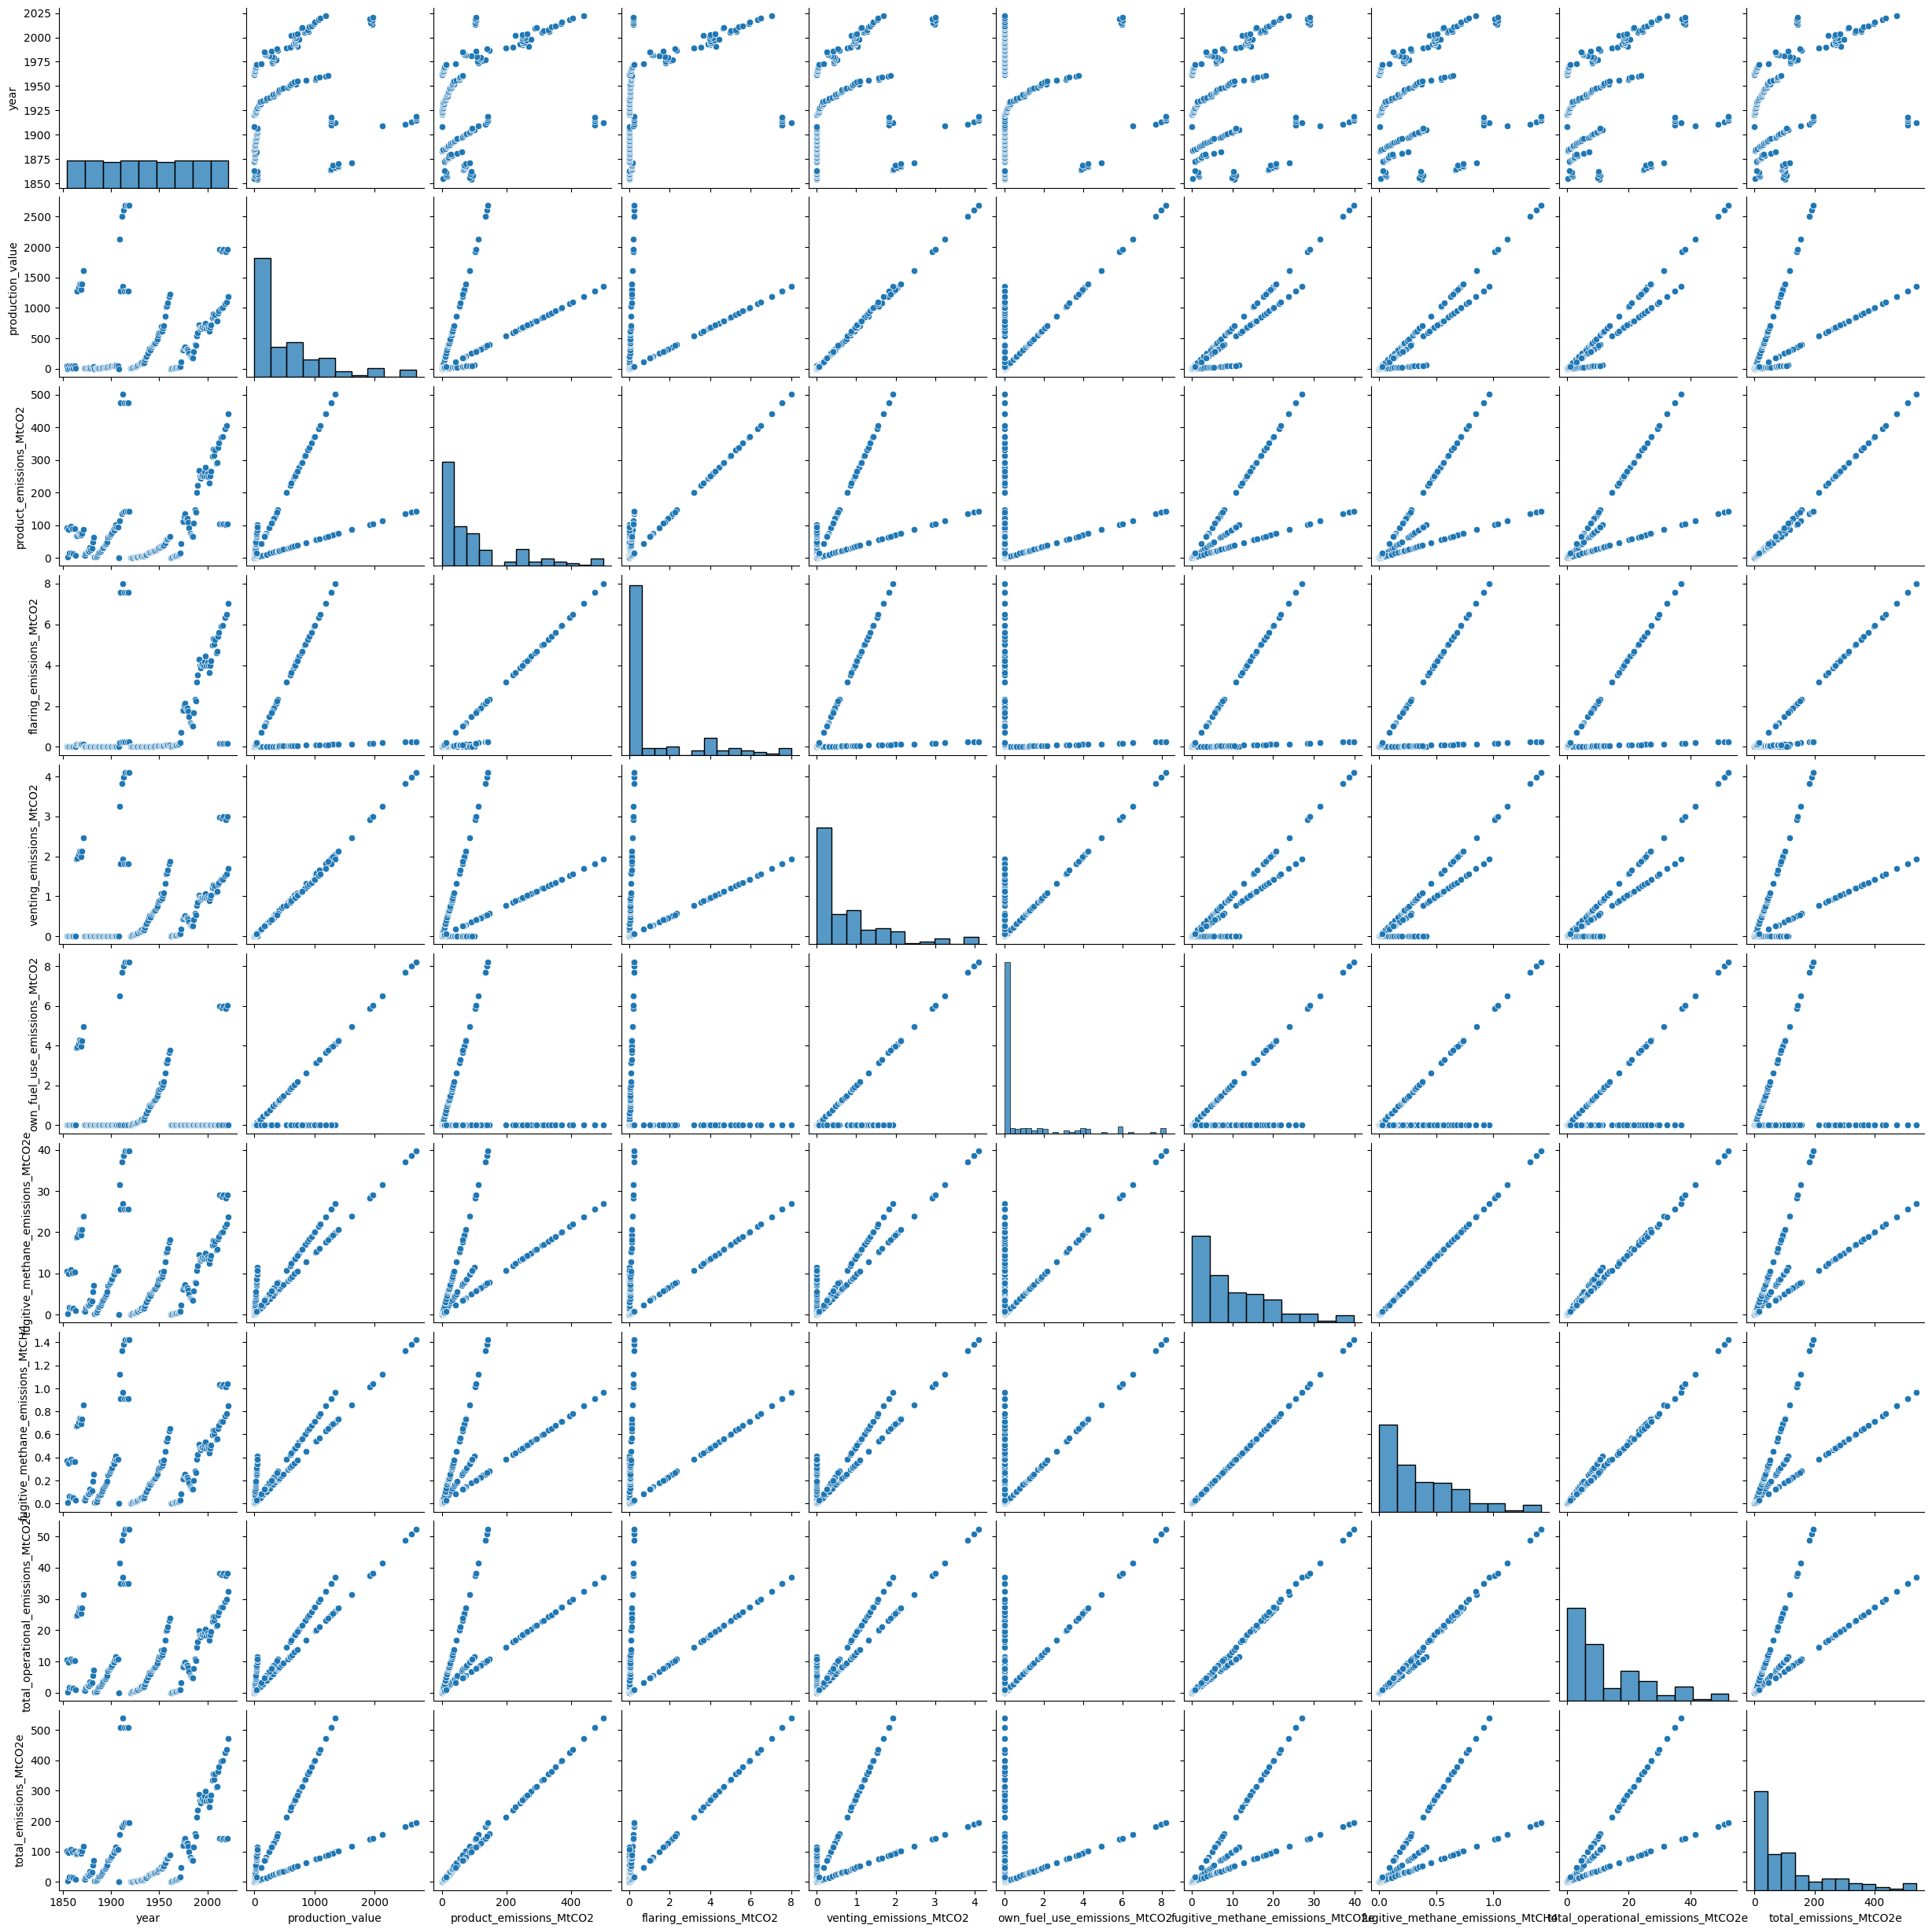

In [6]:
sns.pairplot(data=df);

In [7]:
df.columns

Index(['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity',
       'production_value', 'production_unit', 'product_emissions_MtCO2',
       'flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e',
       'fugitive_methane_emissions_MtCH4',
       'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
       'emissions_category'],
      dtype='object')

(<Figure size 800x600 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

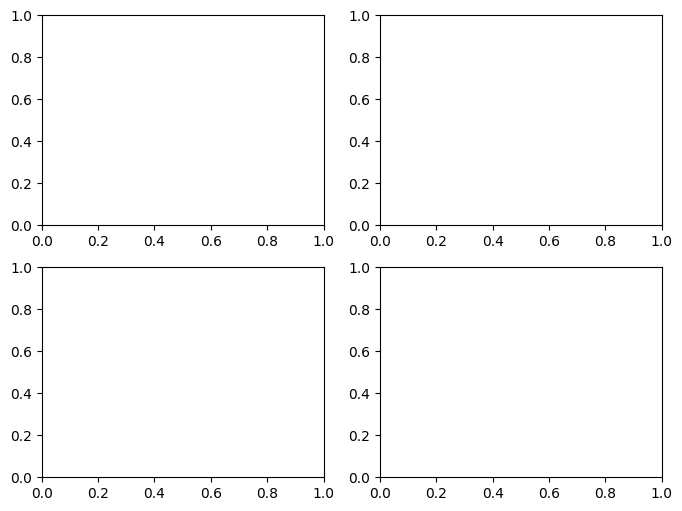

In [8]:
plt.subplots(nrows=2, ncols=2, figsize=(8,6))

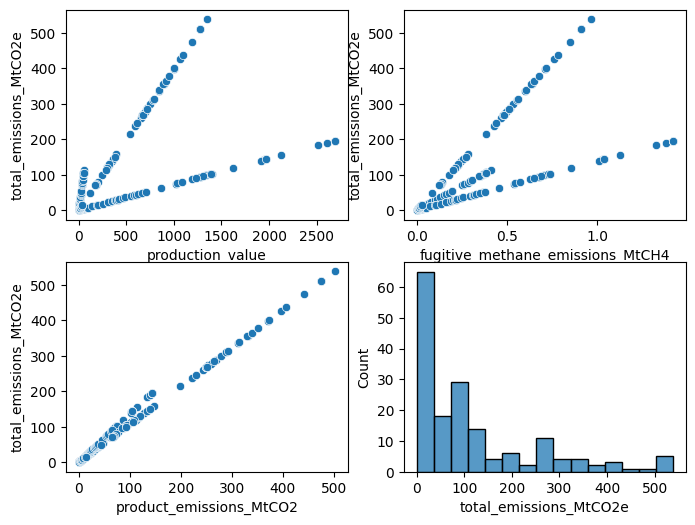

In [9]:
# nrows=2: Creates 2 rows of subplots.
# ncols=2: Creates 2 columns of subplots.
# This results in a total of 4 subplots (2 × 2 = 4).
# figsize=(10,8): The entire figure (not individual subplots) is 10 inches wide and 8 inches tall.
# ax=axes[0,0]),ax=axes[0,1]),ax=axes[1,0]),ax=axes[1,1]) = places this plot in the top-left position (row 0, column 0),
# Placed in the top-right (row 0, column 1),Placed in the bottom-left (row 1, column 0),Placed in the bottom-right (row 1, column 1).

fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
sns.scatterplot(data=df, x='production_value', y='total_emissions_MtCO2e', ax=axes[0,0])
sns.scatterplot(data=df, x='fugitive_methane_emissions_MtCH4', y= 'total_emissions_MtCO2e', ax=axes[0,1])
sns.scatterplot(data=df, x='product_emissions_MtCO2', y='total_emissions_MtCO2e', ax=axes[1,0])
sns.histplot(df['total_emissions_MtCO2e'],  bins = 15, ax=axes[1,1])

plt.show()
 

## Perform EDA

In [10]:
# no EDA to perform in this model as the focus is just on a simple pipeline and how it works...
df.isna().sum()


year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
emissions_category                    0
dtype: int64

## Prepare the data for Modeling

In [11]:
# Dropping one column
# X = df.drop('Sales', axis =1)
# Dropping two columns
X = df.drop(['parent_entity', 'parent_type', 'reporting_entity', 'commodity',
       'production_unit', 'emissions_category'], axis =1)
y = df['total_emissions_MtCO2e']



In [12]:
X.head()


,year,production_value,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e
0,1854,50.9000,92.3401,0.0,0.0,0.0,10.4316,0.3726,10.4316,102.7717
1,1855,0.9000,2.3989,0.0,0.0,0.0,0.2710,0.0097,0.2710,2.6700
2,1856,48.2300,87.4963,0.0,0.0,0.0,9.8844,0.3530,9.8844,97.3807
3,1857,5.7700,15.3799,0.0,0.0,0.0,1.7375,0.0621,1.7375,17.1174
4,1858,52.8073,95.8002,0.0,0.0,0.0,10.8225,0.3865,10.8225,106.6227


In [13]:
#  Predicting against all data  -basically just drawing a line as we have no test data
full_md1 = LinearRegression()
full_md1.fit(X,y)
y_hat = full_md1.predict(X)
y_hat[:5], y[:5]


(array([102.7717,   2.67  ,  97.3807,  17.1174, 106.6227]),
 0    102.7717
 1      2.6700
 2     97.3807
 3     17.1174
 4    106.6227
 Name: total_emissions_MtCO2e, dtype: float64)

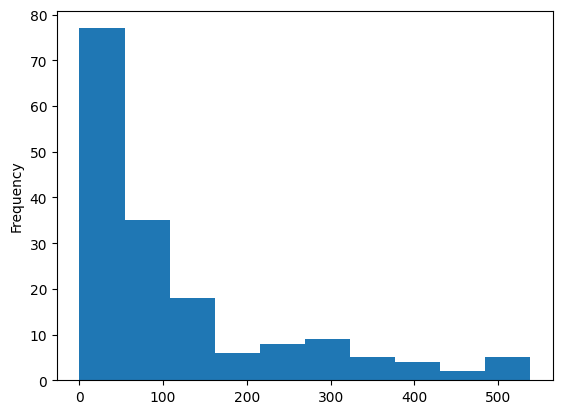

In [14]:
y.plot(kind = 'hist');

## Establish the base units to compare the resultant metrics  ....

In [15]:
df['total_emissions_MtCO2e'].mean(),df['total_emissions_MtCO2e'].median(), df['total_emissions_MtCO2e'].min(),df['total_emissions_MtCO2e'].max(),df['total_emissions_MtCO2e'].max()-df['total_emissions_MtCO2e'].min()


(np.float64(116.19835207100593),
 np.float64(74.0578),
 np.float64(0.1344),
 np.float64(538.5495),
 np.float64(538.4150999999999))

In [16]:

   # OR
ymin = np.min(df['total_emissions_MtCO2e'])
ymax = np.max(df['total_emissions_MtCO2e'])
yrange = (np.max(df['total_emissions_MtCO2e']) - np.min(df['total_emissions_MtCO2e']))
ymean= np.mean(df['total_emissions_MtCO2e'])
ymedian=  np.median(df['total_emissions_MtCO2e'])


ymean, ymedian, ymin,ymax,yrange


(np.float64(116.19835207100593),
 np.float64(74.0578),
 np.float64(0.1344),
 np.float64(538.5495),
 np.float64(538.4150999999999))

In [17]:
   # OR
ymin = np.min(y)
ymax = np.max(y)
yrange = (np.max(y) - np.min(y))
ymean= np.mean(y)
ymedian=  np.median(y)

ymean, ymedian, ymin,ymax,yrange


(np.float64(116.19835207100593),
 np.float64(74.0578),
 np.float64(0.1344),
 np.float64(538.5495),
 np.float64(538.4150999999999))

In [18]:
# how far off on avg?
mse = mean_squared_error(y, y_hat)
print(f"MSE: {mse:.2f}")


MSE: 0.00


In [19]:
y_true = y

In [20]:
# MAPE - mean absolute percentage error - another way to calc as you see above... lower is better for accuracy
# np.abs((y_true - y_pred) / y_true)
np.mean(np.abs((y - y_hat) / y)) * 100


np.float64(1.2343280474424356e-12)

In [21]:
# this is reported in squared units, use this for your rmse calc...
mse = mean_squared_error(y, y_hat)
mse, np.sqrt(mse)


(6.442038781513226e-27, np.float64(8.026231233594772e-14))

In [22]:
#  now take into account a few points being far off ....
# RMSE - analogous to std of your predictions...

rmse = (mean_squared_error(y, y_hat)/y.mean())* 100
print(f"RMSE: {rmse:.2f}")


RMSE: 0.00


## R² Score (Coefficient of Determination)

In [23]:
# coffiecient of determination
r2 = r2_score(y, y_hat)
print(f"R² Score: {r2:.2f}")


R² Score: 1.00


In [24]:
print(f"{r2_score(y, y_hat)* 100:.2f}% of the variability in the dependent variable is explained by the independent variables.") 


100.00% of the variability in the dependent variable is explained by the independent variables.


### Adjusted R-squared Calculation

The formula for adjusted R-squared is:

$$\text{adj\_rsq} = 1 - (1 - r^2) \times \frac{(n - 1)}{(n - k - 1)}$$

**Explanation of the Values:**

- **adj_rsq**: Adjusted R-squared. This is the modified version of R-squared that adjusts for the number of predictors in the model.
- **r^2**: R-squared. This is the coefficient of determination that measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **n**: Total number of observations or data points in the dataset.
- **k**: Number of independent variables or predictors in the model.

### Why Use Adjusted R-Squared?

Adjusted R-squared is used to provide a more accurate measure of the goodness-of-fit of a regression model, especially when multiple independent variables are involved. It takes into account the number of predictors and penalizes for adding variables that do not contribute to the model's explanatory power.

Here's how each component plays a role:
- **\( 1 - R^2 \)**: Calculates the unexplained variance (i.e., the proportion of variance that is not explained by the model).
- **\( \frac{(n - 1)}{(n - k - 1)} \)**: A scaling factor that adjusts for the number of predictors relative to the number of observations.

In essence, adjusted R-squared adjusts for the complexity of the model, ensuring that adding more variables doesn’t artificially inflate the measure of fit.


In [25]:
# adjusted r-square - adjusts for the number of predictors in a model - a better measure when there are many predictor features
r_squ = r2_score(y,y_hat)
n = len(y) 
k = len(X.columns)# number of predictors
adj_rsq = 1 - (1 - r_squ) * (n - 1) / (n - k - 1)
adj_rsq


1.0

In [26]:
evs = explained_variance_score(y, y_hat)  # usually similar to r-squared but can be negative if model is worse than a simple mean prediction
print(f'The explained variance score, {evs:.3} focusses on the variance of the errors.')


The explained variance score, 1.0 focusses on the variance of the errors.


In [27]:
# Create a function that return the adjusted r_square -call it
# 'adj_r2'(float r2, int len,int k)'

def adj_r2(r2,n,k):
    """
    Takes in the r-squared(r2), lenght of y (n), and width of X (k)
    returns the adjusted r-square
    """
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)



In [28]:
adj_r2(r2_score(y,y_hat), len(y), len(X.columns))


1.0

In [29]:
y


0      102.7717
1        2.6700
2       97.3807
3       17.1174
4      106.6227
         ...   
164    426.1241
165    139.8350
166    436.6618
167    143.2930
168    473.0503
Name: total_emissions_MtCO2e, Length: 169, dtype: float64

In [30]:
# Using myfuns created
myfuns.adj_r2(r2_score(y,y_hat), len(y), len(X.columns))


1.0

## Split the data into train and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((118, 10), (51, 10), (118,), (51,))

In [33]:
X_train.head(3)


,year,production_value,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e
160,2014,996.9280,370.2866,5.9041,1.4192,0.0000,19.9430,0.7123,27.2663,397.5529
96,1950,586.6791,31.3485,0.0544,0.8945,1.7952,8.6708,0.3097,11.4148,42.7633
11,1865,1279.5331,68.3703,0.1187,1.9509,3.9152,18.9107,0.6754,24.8954,93.2657


## Linear Regression

In [34]:
# Initialize the logistic regression model
md1 = LinearRegression()


In [35]:
# Train the model
md1.fit(X_train, y_train)

LinearRegression()

In [36]:
# Assigning y_hat variable
y_hat = md1.predict(X_test)
len(y_hat)


51

## Metrics for Classification

In [37]:
# how far off on avg?
mean_absolute_error(y_test, y_hat)


4.9370094069556716e-14

In [38]:
#  now take into account a few points being far off ....
# RMSE - analogous to std of your predictions...
np.sqrt(mean_squared_error(y_test, y_hat))


np.float64(6.615070741123835e-14)

In [39]:
# coffiecient of determination
r2 = r2_score(y_test,y_hat)
r2


1.0

In [40]:
# Applying my saved function
myfuns.adj_r2(r2,len(y_test),len(X_test.columns))


1.0

In [41]:
# printing the variability
print(f"{r2_score(y_test, y_hat)* 100:.2f}% of the variability in the dependent variable is explained by the independent variables.") 


100.00% of the variability in the dependent variable is explained by the independent variables.


In [42]:
# evaluating residuals
pd.DataFrame({'Actual': y_test, 'Preds': y_hat})


,Actual,Preds
138,268.0984,268.0984
30,2.8267,2.8267
119,46.9411,46.9411
29,2.0191,2.0191
143,282.3746,282.3746
162,399.6468,399.6468
165,139.8350,139.8350
51,113.4729,113.4729
105,78.7965,78.7965
60,509.4388,509.4388


In [43]:
# evaluating residuals contd..
eval_df = pd.DataFrame({'Actuals': y_test, 'Preds': y_hat})
eval_df['abs_diff'] = np.abs(eval_df['Actuals'] - eval_df['Preds'])
eval_df['residuals'] = eval_df['Actuals'] - eval_df['Preds']
eval_df.head()


,Actuals,Preds,abs_diff,residuals
138,268.0984,268.0984,5.684342e-14,5.684342e-14
30,2.8267,2.8267,1.465494e-14,1.465494e-14
119,46.9411,46.9411,6.394885e-14,-6.394885e-14
29,2.0191,2.0191,1.554312e-14,1.554312e-14
143,282.3746,282.3746,0.000000e+00,0.000000e+00


In [44]:
eval_df.mean()


Actuals      1.160022e+02
Preds        1.160022e+02
abs_diff     4.937009e-14
residuals    8.448580e-15
dtype: float64

In [45]:
# Calculating the mean_absolute_error
mean_absolute_error(eval_df.Actuals,eval_df.Preds)


4.9370094069556716e-14

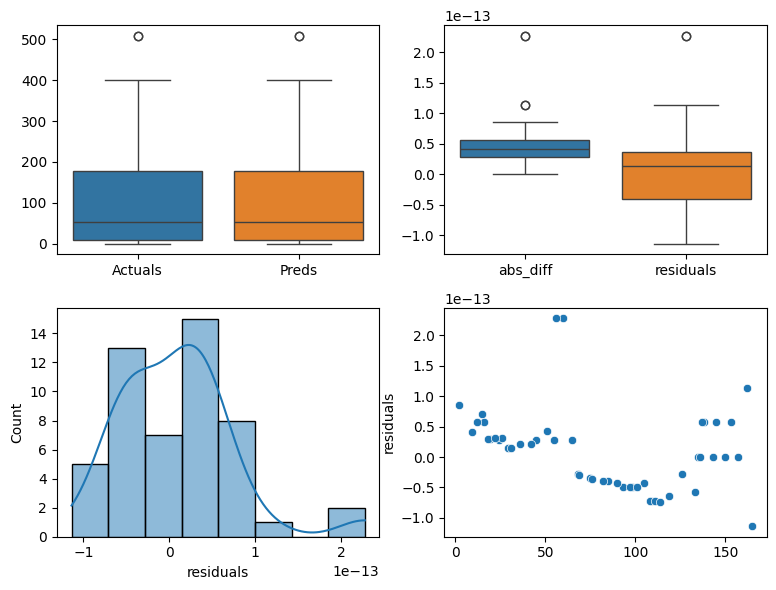

In [46]:
# More visual explanation....

fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
sns.boxplot(data=eval_df[['Actuals', 'Preds']], ax=axes[0,0]) 
sns.boxplot(data=eval_df[['abs_diff', 'residuals']], ax=axes[0,1])
sns.histplot(data=eval_df['residuals'], kde=True, bins=8, ax=axes[1,0])
sns.scatterplot(data=eval_df['residuals'], ax=axes[1,1])
 
plt.tight_layout()
plt.show()
 

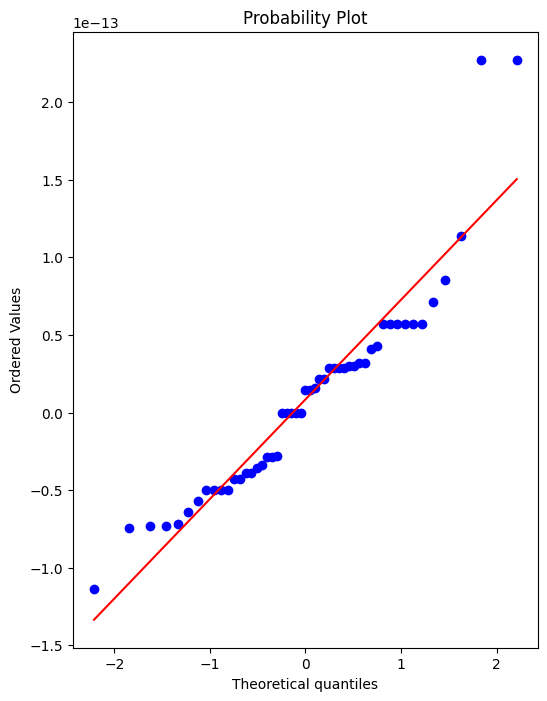

In [47]:
# Need scipy for the probability plot below (optional)

import scipy as sp
 
# probability plot (more stats / R based concept)
fig, ax = plt.subplots(figsize=(6,8))
_ = sp.stats.probplot(eval_df['residuals'], plot=ax)

# red line represent a perfect normal distribution

plt.show()
 

## Insights Based on the Findings:

###  Key Observations

The absolute differences and residuals are extremely small (close to zero), indicating an excellent fit of the model to the data.

The predicted values align almost perfectly with the actual values, suggesting that the model captures the relationship between production and emissions effectively.

No significant errors or deviations were observed in the predictions, which validates the accuracy of the regression model.

### Conclusion & Implications

Based on the findings, the Linear Regression Model is highly accurate in predicting total emissions (MtCO2e) from the production data. This suggests that:
Production volume is a strong predictor of total emissions.

The model can be used for forecasting future emissions trends.

Organizations can rely on the model for emission reduction strategies and regulatory reporting.

Further analysis can explore the impact of different emission sources to optimize carbon management strategies.
  




This analysis provides a strong foundation for data-driven decision-making in emissions management and climate action initiatives.